In [1]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
# from keras import backend as K
# import tensorflow as tf
# print(tf.__version__)

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# load the data

curr_path = "/content/drive/MyDrive/Senior/Spring/EECSC106B/FinalProject/"
sys.path.append(os.path.abspath(curr_path))

cat = np.load(curr_path + 'data/cat.npy')
sheep = np.load(curr_path + 'data/sheep.npy')
giraffe = np.load(curr_path + 'data/giraffe.npy')
bat = np.load(curr_path + 'data/bat.npy')
octopus = np.load(curr_path + 'data/octopus.npy')
camel = np.load(curr_path + 'data/camel.npy')
print(cat.shape)
print(sheep.shape)
print(giraffe.shape)
print(bat.shape)
print(octopus.shape)
print(camel.shape)

(123202, 784)
(126121, 784)
(127182, 784)
(118114, 784)
(150152, 784)
(121399, 784)


In [4]:
#add a column for labels
cat = np.c_[cat, np.zeros(len(cat))]
giraffe = np.c_[giraffe, np.ones(len(giraffe))]
sheep = np.c_[sheep, 2*np.ones(len(sheep))]
bat = np.c_[bat, 3*np.ones(len(bat))]
octopus = np.c_[octopus, 4*np.ones(len(octopus))]
camel = np.c_[camel, 5*np.ones(len(camel))]
print(cat.shape)

(123202, 785)


In [5]:
#make sure data was imported and stored correctly
def plot_samples(input_array, rows=4, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

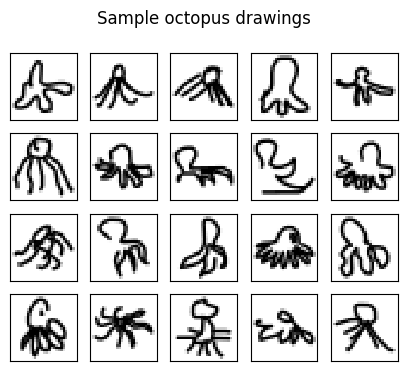

In [6]:
plot_samples(octopus, title='Sample octopus drawings\n')

In [7]:
# Merging arrays and splitting the features and labels
y = np.concatenate((cat[:10000,-1], giraffe[:10000,-1], sheep[:10000,-1], bat[:10000,-1], octopus[:10000,-1],  camel[:10000,-1]), axis=0).astype('float32') # the last column
X = np.concatenate((cat[:10000,:-1], giraffe[:10000,:-1], sheep[:10000,:-1], bat[:10000,:-1], octopus[:10000,:-1], camel[:10000, :-1]), axis=0).astype('float32') # all columns but the last

# Split data between train and test (80 - 20 ratio). Normalizing the value between 0 and 1
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [8]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [9]:
#create CNN model
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
%%time
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=15, batch_size=200)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/15
240/240 [==============================] - 45s 177ms/step - loss: 0.7789 - accuracy: 0.7260 - val_loss: 0.4552 - val_accuracy: 0.8512
Epoch 2/15
240/240 [==============================] - 37s 155ms/step - loss: 0.4404 - accuracy: 0.8543 - val_loss: 0.3514 - val_accuracy: 0.8863
Epoch 3/15
240/240 [==============================] - 40s 167ms/step - loss: 0.3677 - accuracy: 0.8779 - val_loss: 0.3165 - val_accuracy: 0.8976
Epoch 4/15
240/240 [==============================] - 40s 166ms/step - loss: 0.3305 - accuracy: 0.8897 - val_loss: 0.2868 - val_accuracy: 0.9078
Epoch 5/15
240/240 [==============================] - 37s 155ms/step - loss: 0.3025 - accuracy: 0.8998 - val_loss: 0.2773 - val_accuracy: 0.9081
Epoch 6/15
240/240 [==============================] - 39s 164ms/step - loss: 0.2819 - accuracy: 0.9070 - val_loss: 0.2619 - val_accuracy: 0.9151
Epoch 7/15
240/240 [==============================] - 37s 156ms/step - loss: 0.2655 - accuracy: 0.9117 - val_loss: 0.2577 - val_ac

In [13]:
# y_pred_cnn = model_cnn.predict(X_test_cnn, verbose=0)
y_pred_cnn = np.argmax(model_cnn.predict(X_test_cnn), axis=-1)
c_matrix = metrics.confusion_matrix(y_test, y_pred_cnn)


375/375 [==============================] - 3s 7ms/step


In [14]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

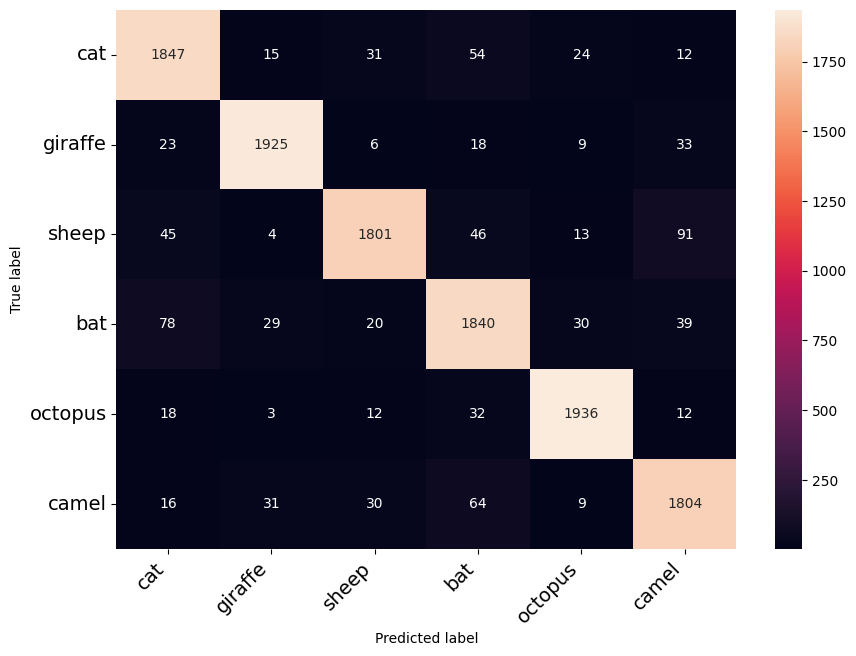

In [15]:
class_names = ['cat', 'giraffe', 'sheep', 'bat', 'octopus', 'camel']
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

In [17]:
#save model
import pickle
with open(curr_path + 'model_cnn.pkl', 'wb') as file:
      pickle.dump(model_cnn, file)